# analysing the effect of downsampling the data using rolling mean

In [1]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

edf_files_severe = [
    "c:\\Users\\anany\\Downloads\\00000066-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[007].edf"
]

edf_files_normal = [
    "C:\\Users\\anany\\Downloads\\00000064-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[009].edf"
]

edf_files_moderate = [
    "C:\\Users\\anany\\Downloads\\00000074-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[009].edf"
]

edf_files_mild = [
    "C:\\Users\\anany\\Downloads\\00000067-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[011].edf",
]

labels = signal_labels(edf_files_normal[0])
print(labels)
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
cv_dict = {}

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow Patient', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


In [4]:
def plot_signal(label, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(signal)
    plt.title(f"{label} signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    # plt.ylim(-300, 300)
    plt.show()

def thresholding(signal, threshold):
    mean = signal.mean()
    std = np.std(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, mean)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

therm_index = labels.index("Flow patient 1")
print(therm_index)

16


In [7]:
def rolling_mean(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

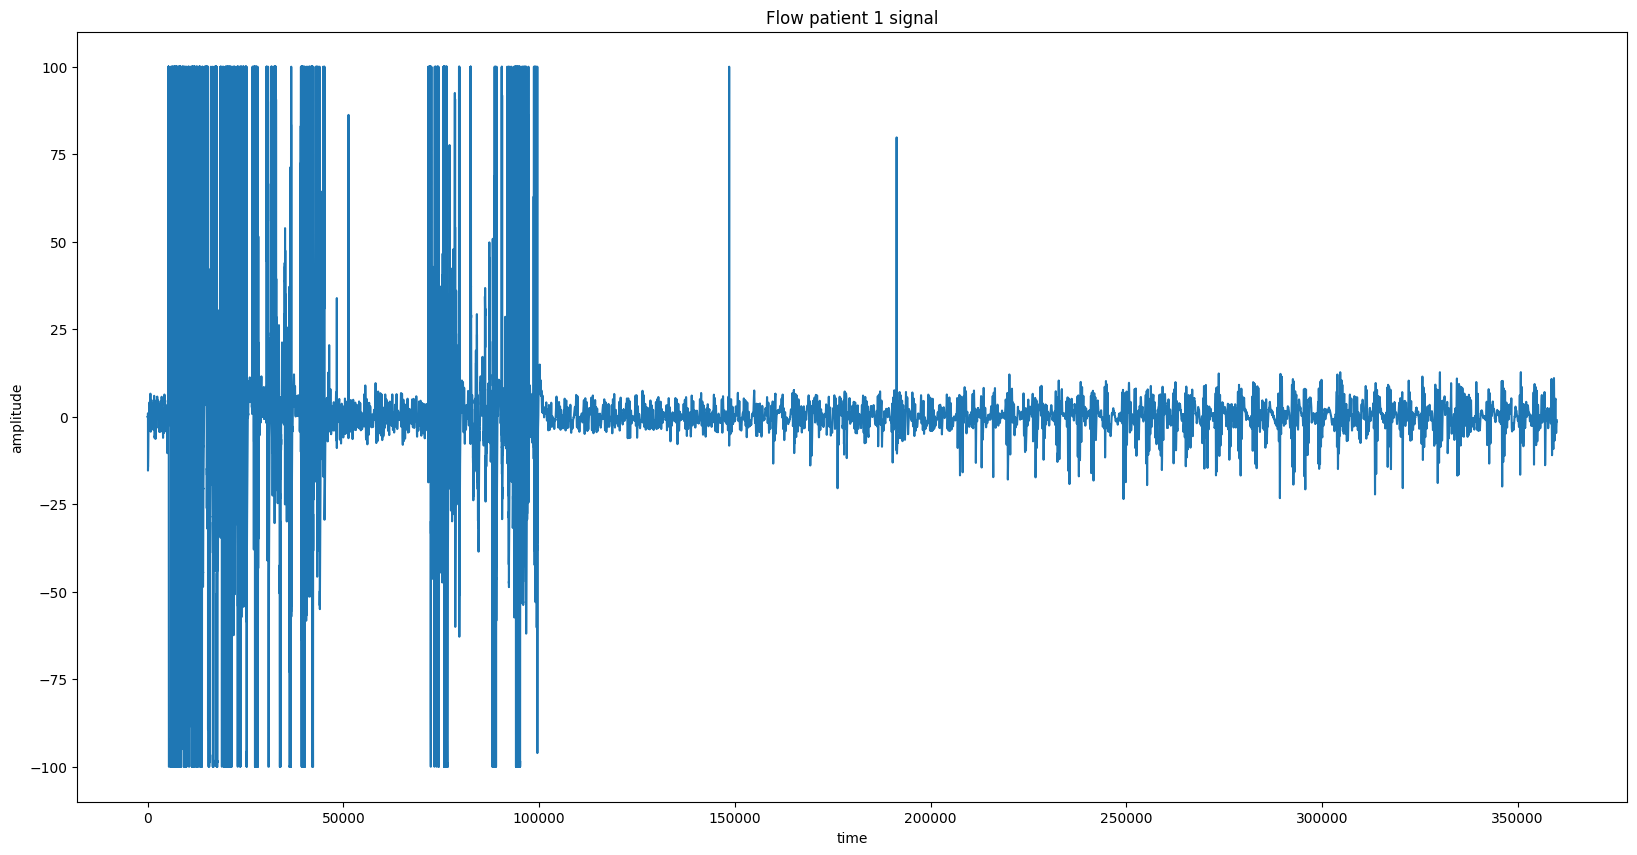

In [12]:
original_signal = read_file_signal(edf_files_severe[0], therm_index)
denoised_signal = thresholding(original_signal, 2)
plot_signal(labels[therm_index], original_signal)

## 0.01 seconds recording

In [13]:
signal1 = read_file_signal(edf_files_severe[0], therm_index)
denoised1 = thresholding(signal1, 2)
rm1 = rolling_mean(denoised1, 1000)
print(rm1)

[-1.06925765 -1.06817731 -1.06717327 ... -0.83308156 -0.83406729
 -0.83491264]


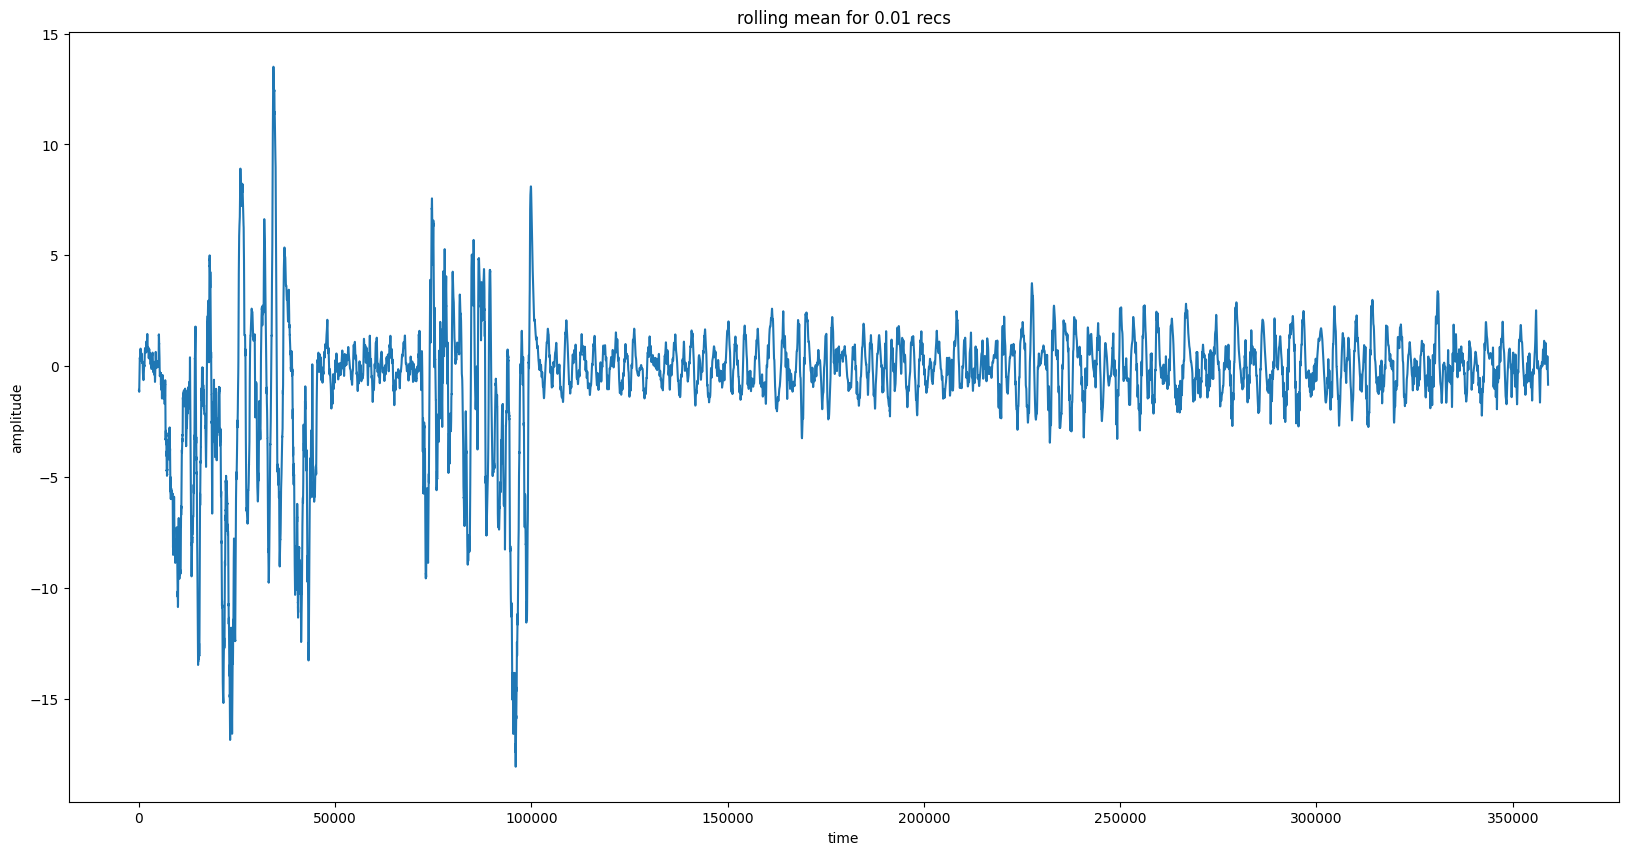

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(rm1)
plt.title(f"rolling mean for 0.01 recs")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

## 0.1 seconds recording

In [15]:
signal2 = read_file_signal(edf_files_severe[0], therm_index)
denoised2 = thresholding(signal2, 2)
resampled2 = resample_signal(denoised2, 36000)
rm2 = rolling_mean(resampled2, 100)
print(rm2)

[-1.05763434 -1.04685003 -1.04425784 ... -0.80848767 -0.82951262
 -0.83799816]


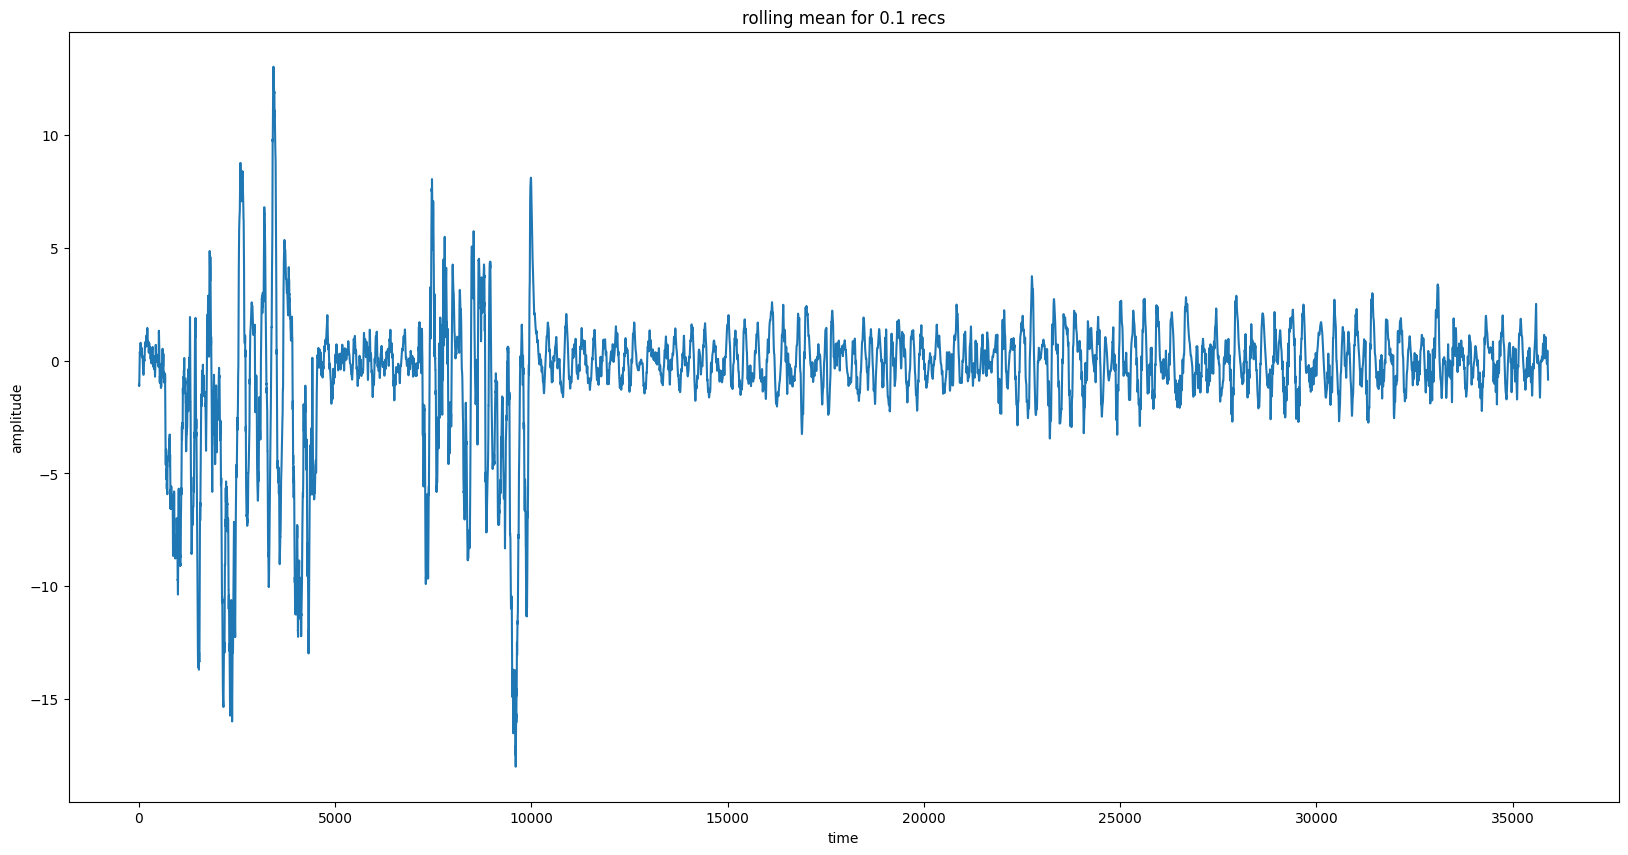

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(rm2)
plt.title(f"rolling mean for 0.1 recs")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

## 1 second recordings

In [17]:
signal3 = read_file_signal(edf_files_severe[0], therm_index)
denoised3 = thresholding(signal3, 2)
resampled3 = resample_signal(denoised3, 3600)
rm3 = rolling_mean(resampled3, 10)
print(rm3)

[-1.13251723 -1.02658205  0.43927413 ...  0.46000562 -0.62665008
 -0.71471088]


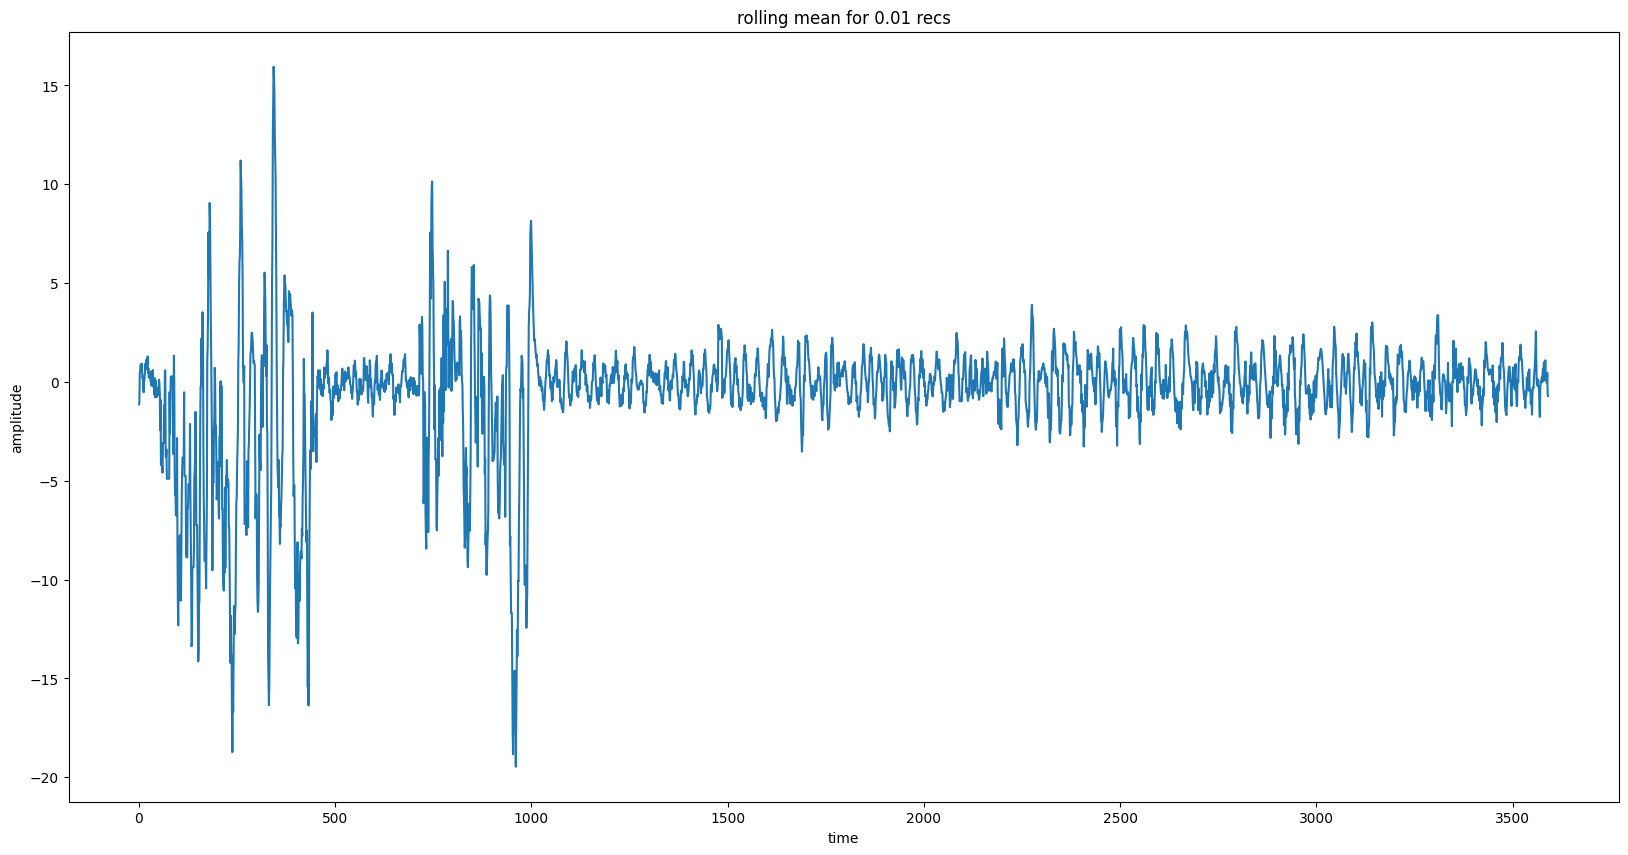

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(rm3)
plt.title(f"rolling mean for 0.01 recs")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

In [20]:
print(len(rm1))
print(len(rm2))
print(len(rm3))

359001
35901
3591


## for 10 second intervals

[-1.0692576485847258, -0.28916151674677654, 0.898609903105211, 0.2280796520943008, -0.06796978713664453, -47.018811322194246, -22.67142137788968, -22.622662699320973, -13.628204776073854, -17.19582513160907, -5.1094926375219325, 4.051630426489664, -13.795684748607613, -12.0858350499733, 30.072101930266268, -6.386022735942628, -21.214068818188753, 13.486387426565948, 8.86323338673991, -14.203488212405585, -3.3491203173876527, -27.161397726405735, 5.967852292668041, -7.85829556725414, -0.881840238040742, 0.4545296406500349, 25.362517738612954, -7.176192874036775, -13.587905699244681, 1.8084504463263904, 3.144075684748608, 25.652121766994732, 34.88047913328755, -31.490415808346686, 7.292384222171359, 3.018219272144656, -50.01996490424964, 5.094114595254445, 2.0339909971770807, -3.848990615701532, -9.976379034103912, 6.099934386205844, -3.0278904402227806, -0.31470817120622496, -4.635309376668954, -2.7907621881437397, 0.468586251621271, -0.361242084382391, 2.0726634622720685, -1.8972884718

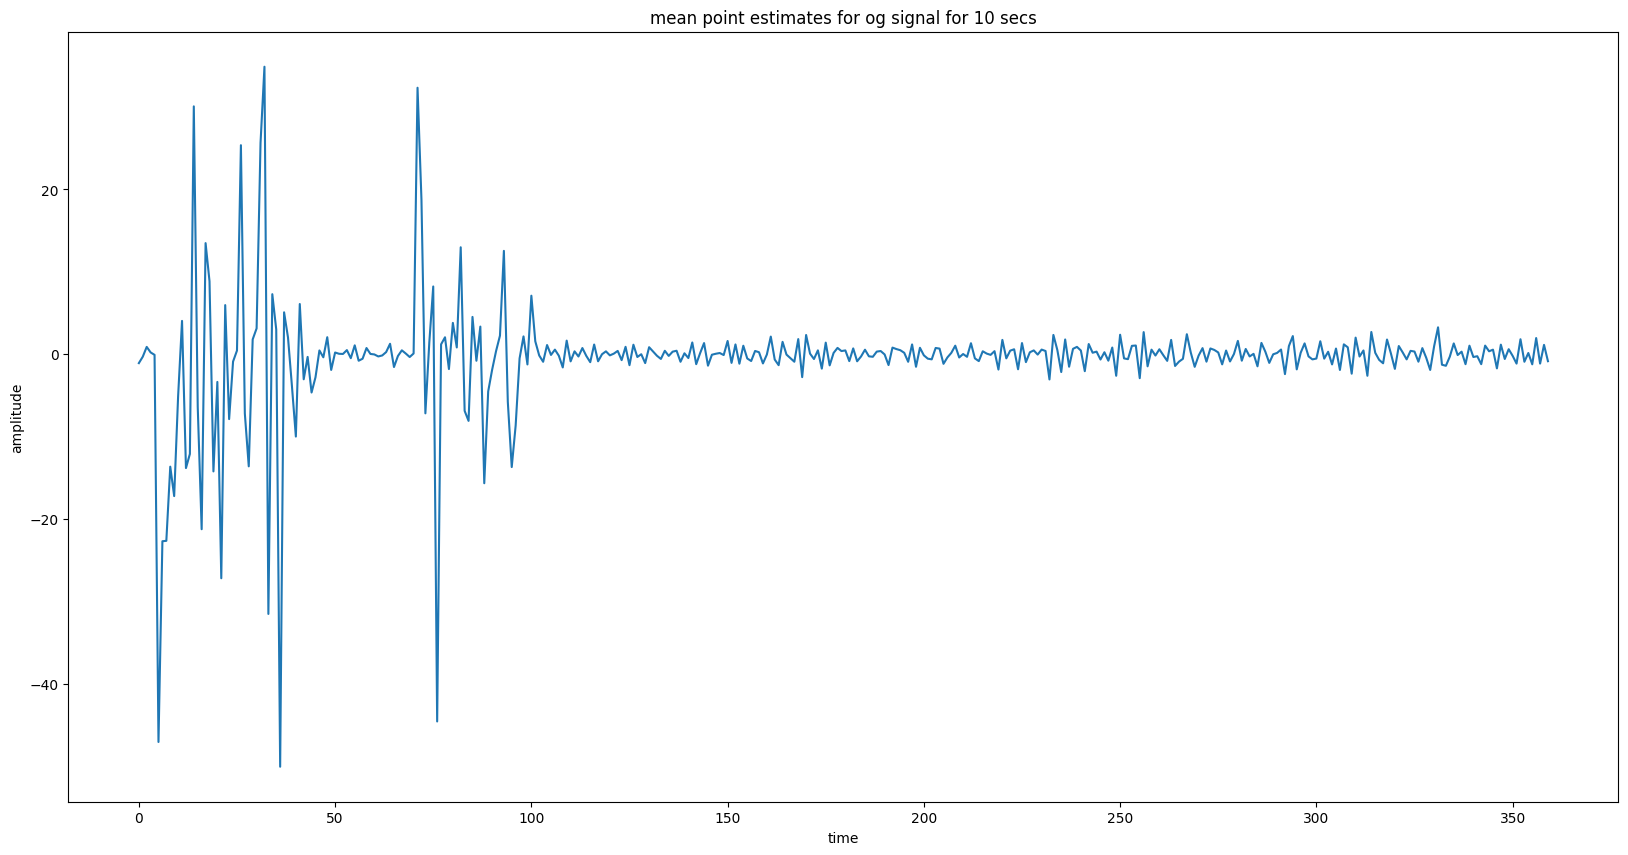

In [24]:
means1 = []
for i in range(360):
    means1.append(np.mean(signal1[i*1000:(i+1)*1000]))

print(means1)
plt.figure(figsize=(20, 10))
plt.plot(means1)
plt.title(f"mean point estimates for og signal for 10 secs")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

[-1.0576343396092187, -0.258438325049225, 0.8868440067317631, 0.20920672260054857, -0.028192271975346142, -0.1033913121019806, 0.42977877831415356, -5.095174670202489, -5.729167311895136, -6.609761039470227, -8.18631504658433, -3.1960056047344847, -3.98291656007489, 1.9353943150384296, -5.808594767418891, -12.652834854713529, -1.8043113198245777, -2.4737394075510037, 4.775601461469262, -2.3420260506012744, -2.590302335088381, -6.6801761527588175, -7.612524443715802, -12.336998355535714, -11.753242511218202, -3.5585178067949332, 7.590803376182565, 0.7891796188113684, -4.22319471827879, 1.813925520548352, -1.6437007664698309, -2.273768962837601, 6.229504935102377, -9.306287400967614, 6.972926550165118, 2.6285016031099575, -7.804470191859791, 5.069605581666209, 2.0367247080668163, 1.5671451385403072, -11.049003693763431, -9.821997854957662, -2.7775450126056347, -8.740162894041605, -4.724517052074667, -4.576179966028833, 0.39810638840235496, -0.35998541222416186, 2.0068079703634742, -1.889

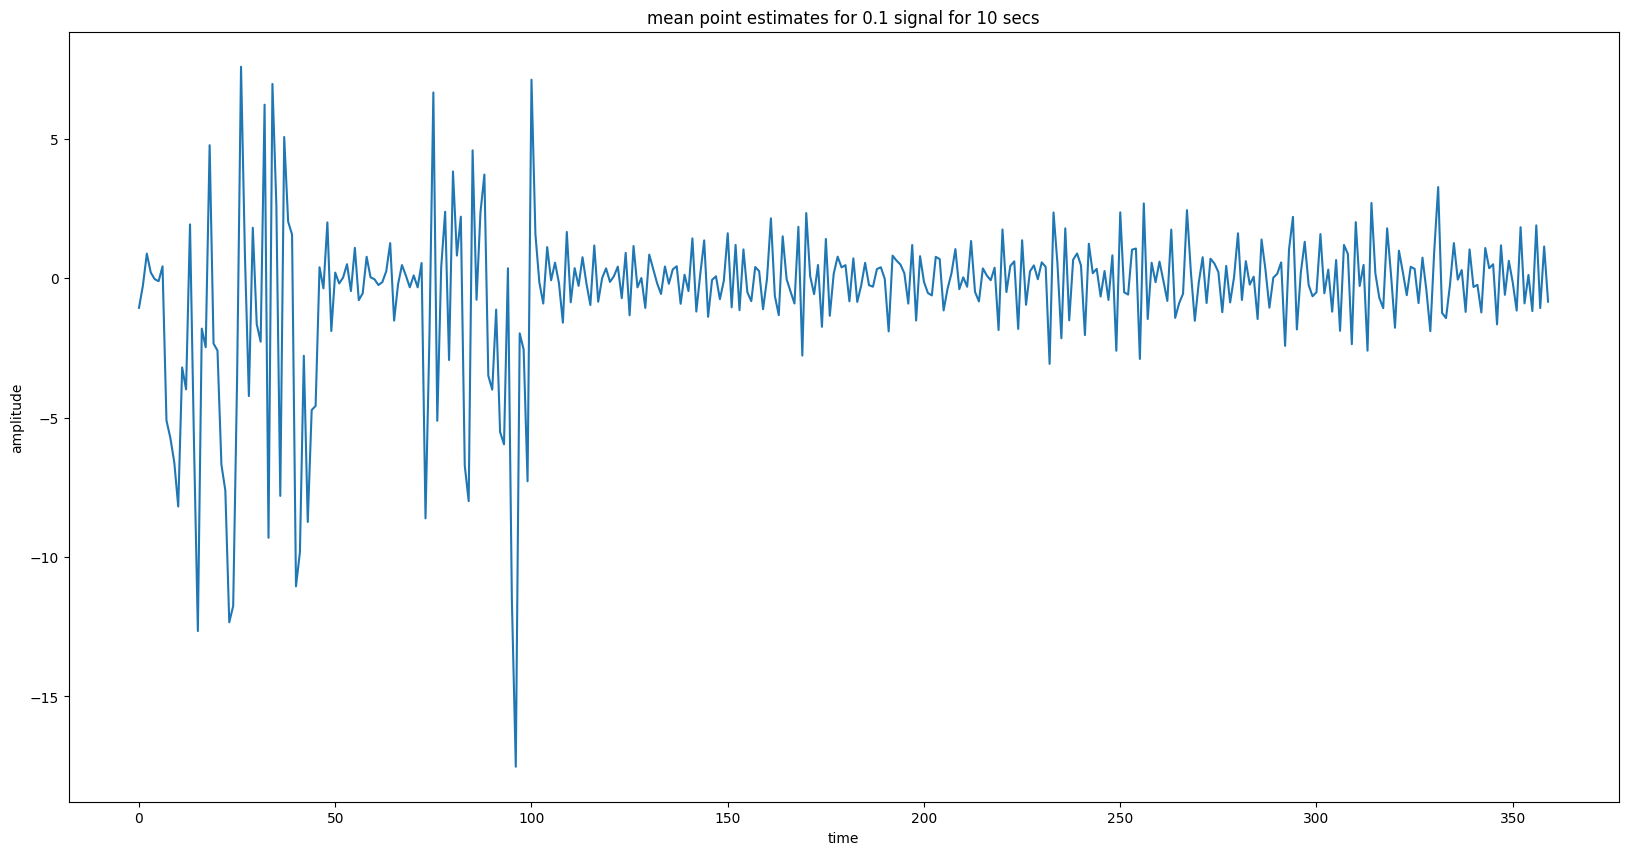

In [27]:
means2 = []
for i in range(360):
    means2.append(np.mean(resampled2[i*100:(i+1)*100]))

print(means2)
plt.figure(figsize=(20, 10))
plt.plot(means2)
plt.title(f"mean point estimates for 0.1 signal for 10 secs")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

[-1.132517227929657, 0.27254843239624765, 0.6974715325860094, 0.012086722545886807, 0.1925686867445112, -0.6387263950271966, -4.588135154732345, -3.4099070738474055, -0.8647310434595958, -0.4080821452573552, -12.31157112539674, -4.471732784157945, -8.775261373475612, -2.123965738841776, -8.397051256649444, -12.008335481389802, 0.7884279262729741, -9.103132670151826, 9.05434362004836, -5.106717512031922, -5.630094730091066, -0.2023027154810869, -9.406081644571547, -7.350907414828434, -16.67961387045552, -4.280490121635141, 10.51653339398892, -7.185493242902932, -3.119089869556042, 1.9304157651007827, -5.720618731173048, -4.458228853727674, 5.531021358258133, -15.125541465822087, 7.0406219202541624, 4.495653733237804, -7.223450186676326, 4.756081355135094, 2.0564243354645906, 3.62785006157538, -11.653257660269183, -9.878196445559112, 1.169988151611213, -15.438089736779634, -2.1208177767778125, -1.7844007896798018, 0.29409261106993717, -0.36639493609066315, 1.602028724907099, -1.928535161

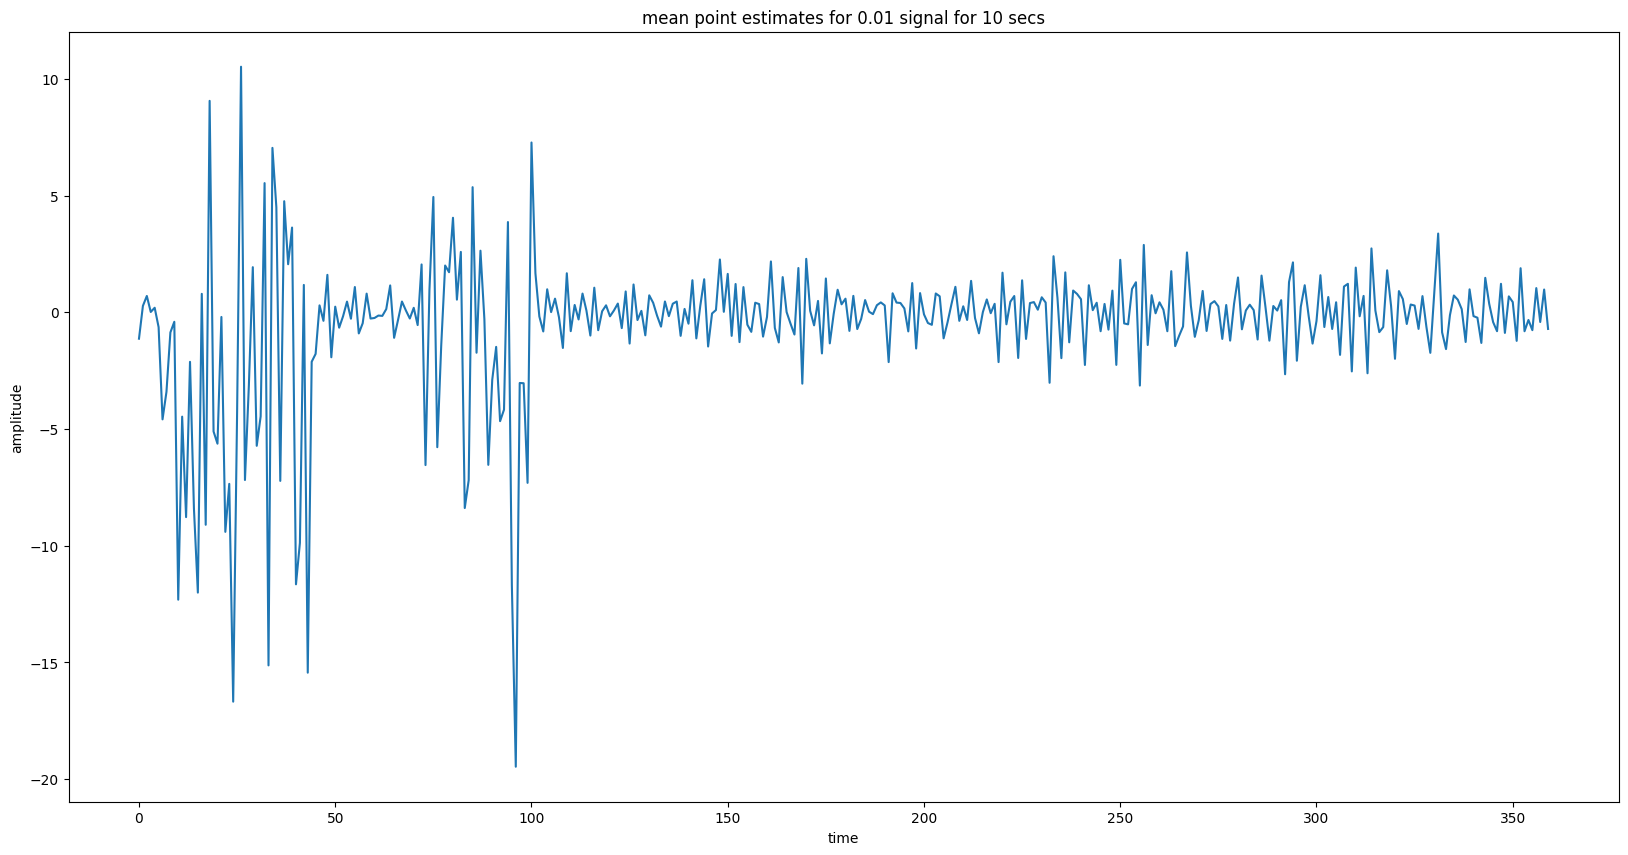

In [28]:
means3 = []
for i in range(360):
    means3.append(np.mean(resampled3[i*10:(i+1)*10]))

print(means3)
plt.figure(figsize=(20, 10))
plt.plot(means3)
plt.title(f"mean point estimates for 0.01 signal for 10 secs")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

In [29]:
print(len(means1))
print(len(means2))
print(len(means3))  

360
360
360


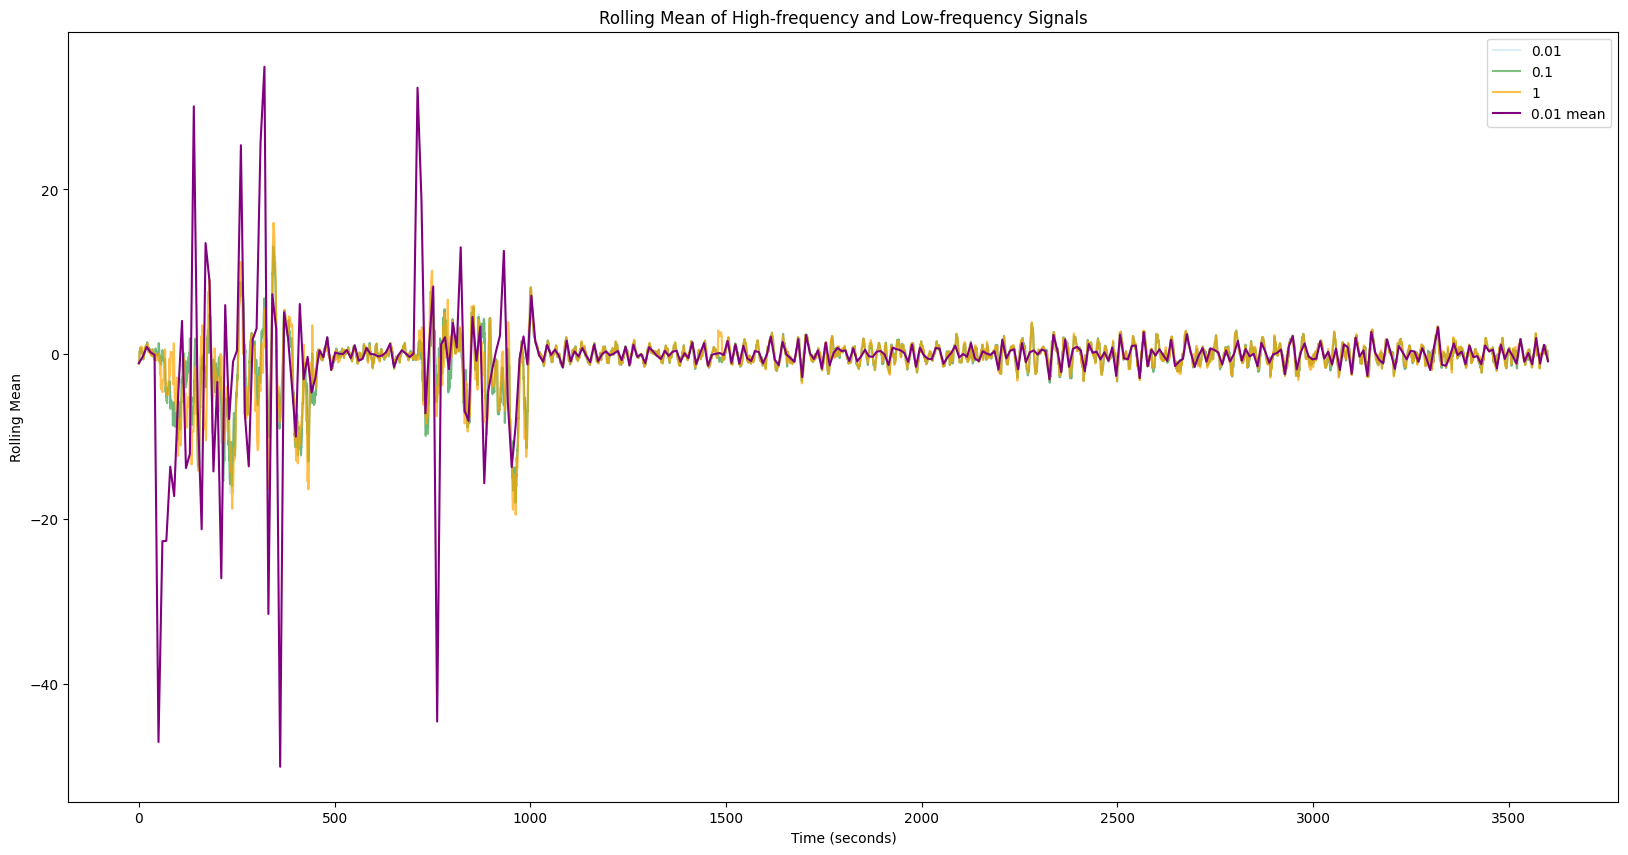

In [39]:
x1 = np.linspace(0, 3600, 359001)
x2 = np.linspace(0, 3600, 35901)
x3 = np.linspace(0, 3600, 3591)
x4 = np.linspace(0, 3600, 360)

plt.figure(figsize=(20, 10))

plt.plot(x1, rm1, label='0.01', alpha=0.3, color='skyblue')
plt.plot(x2, rm2, label='0.1', alpha=0.5, color='green')
plt.plot(x3, rm3, label='1', alpha=0.7, color='orange')
plt.plot(x4, means1, label='0.01 mean', alpha=1, color='purple')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of High-frequency and Low-frequency Signals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

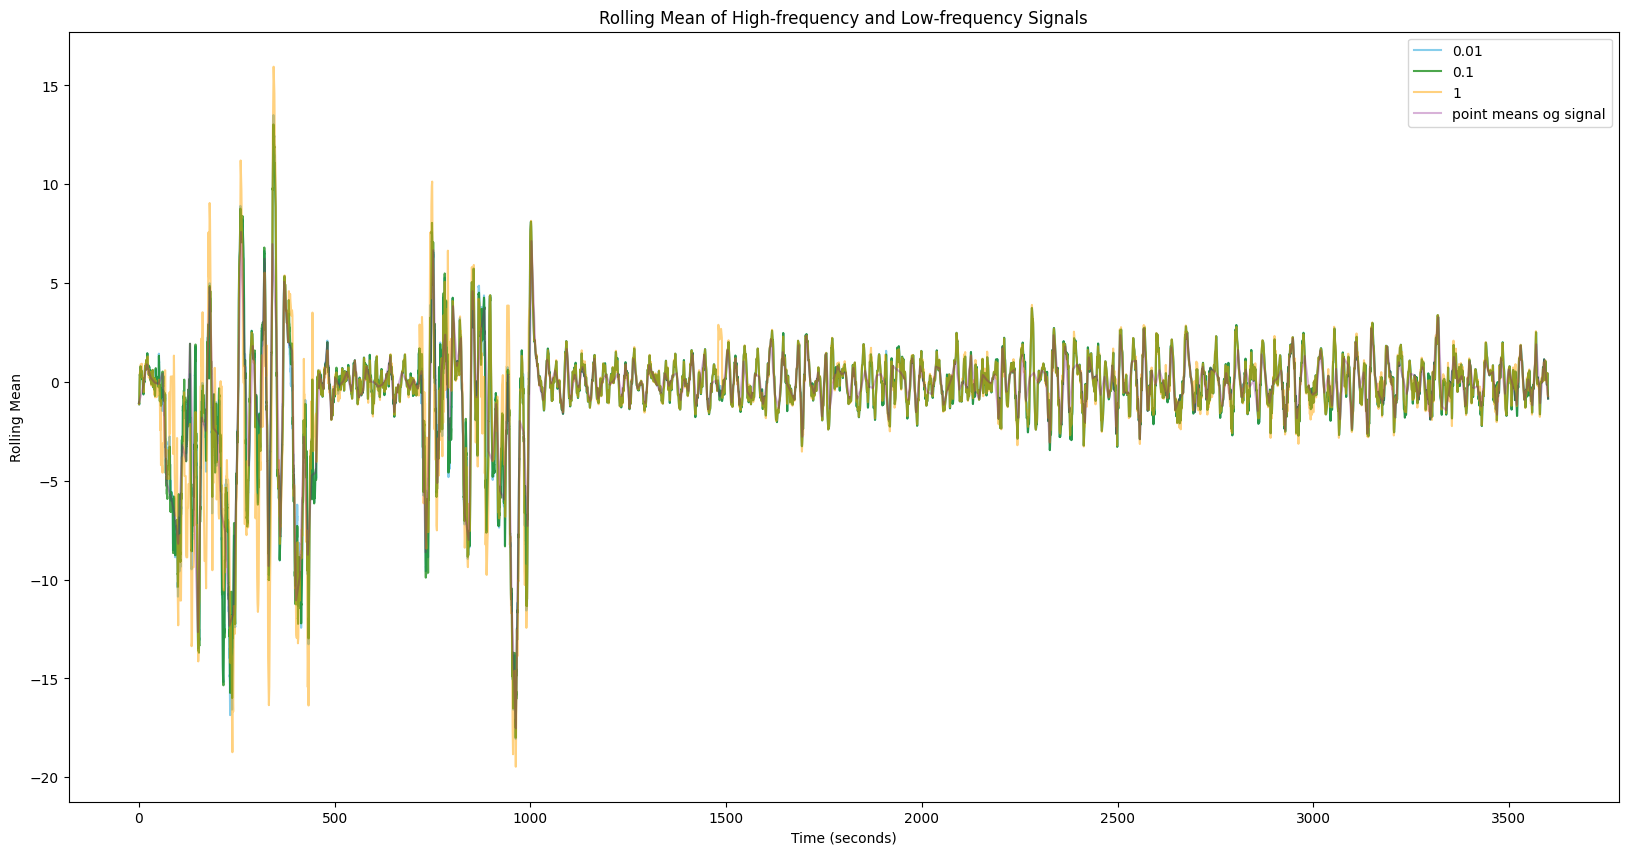

In [53]:
x1 = np.linspace(0, 3600, 359001)
x2 = np.linspace(0, 3600, 35901)
x3 = np.linspace(0, 3600, 3591)
x4 = np.linspace(0, 3600, 360)

plt.figure(figsize=(20, 10))
plt.plot(x1, rm1, label='0.01', alpha=1, color='skyblue')
plt.plot(x2, rm2, label='0.1', alpha=0.7, color='green')
plt.plot(x3, rm3, label='1', alpha=0.5, color='orange')
plt.plot(x4, means2, label='point means og signal', alpha=0.3, color='purple')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of High-frequency and Low-frequency Signals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

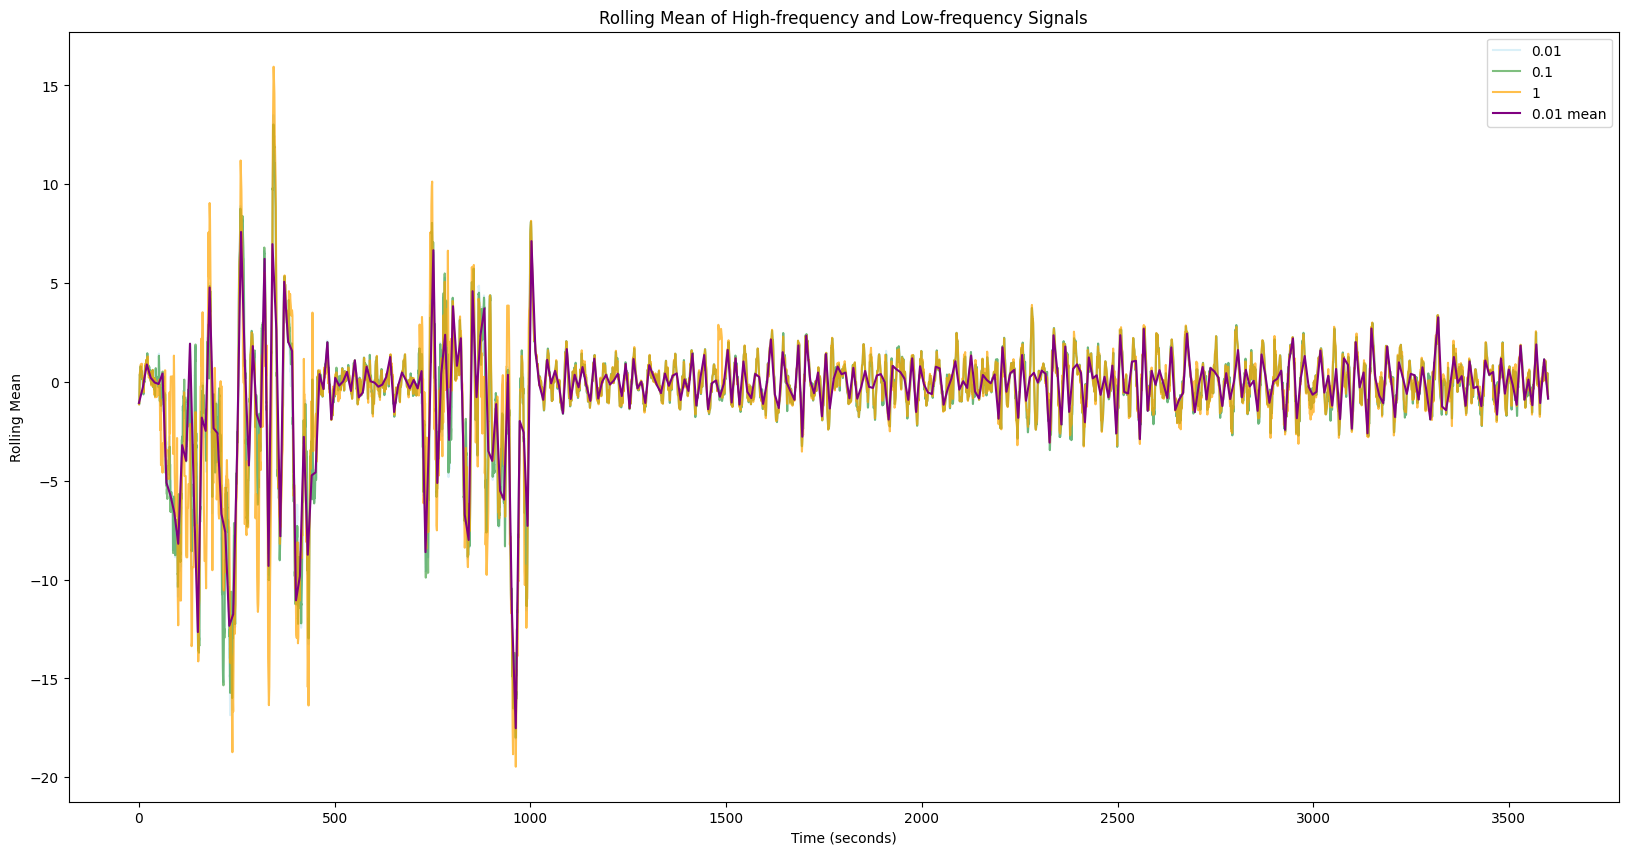

In [42]:
x1 = np.linspace(0, 3600, 359001)
x2 = np.linspace(0, 3600, 35901)
x3 = np.linspace(0, 3600, 3591)
x4 = np.linspace(0, 3600, 360)

plt.figure(figsize=(20, 10))
plt.plot(x1, rm1, label='0.01', alpha=1, color='skyblue')
plt.plot(x2, rm2, label='0.1', alpha=0.7, color='green')
plt.plot(x3, rm3, label='1', alpha=0.5, color='orange')
plt.plot(x4, means2, label='0.01 mean', alpha=0.3, color='purple')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of High-frequency and Low-frequency Signals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

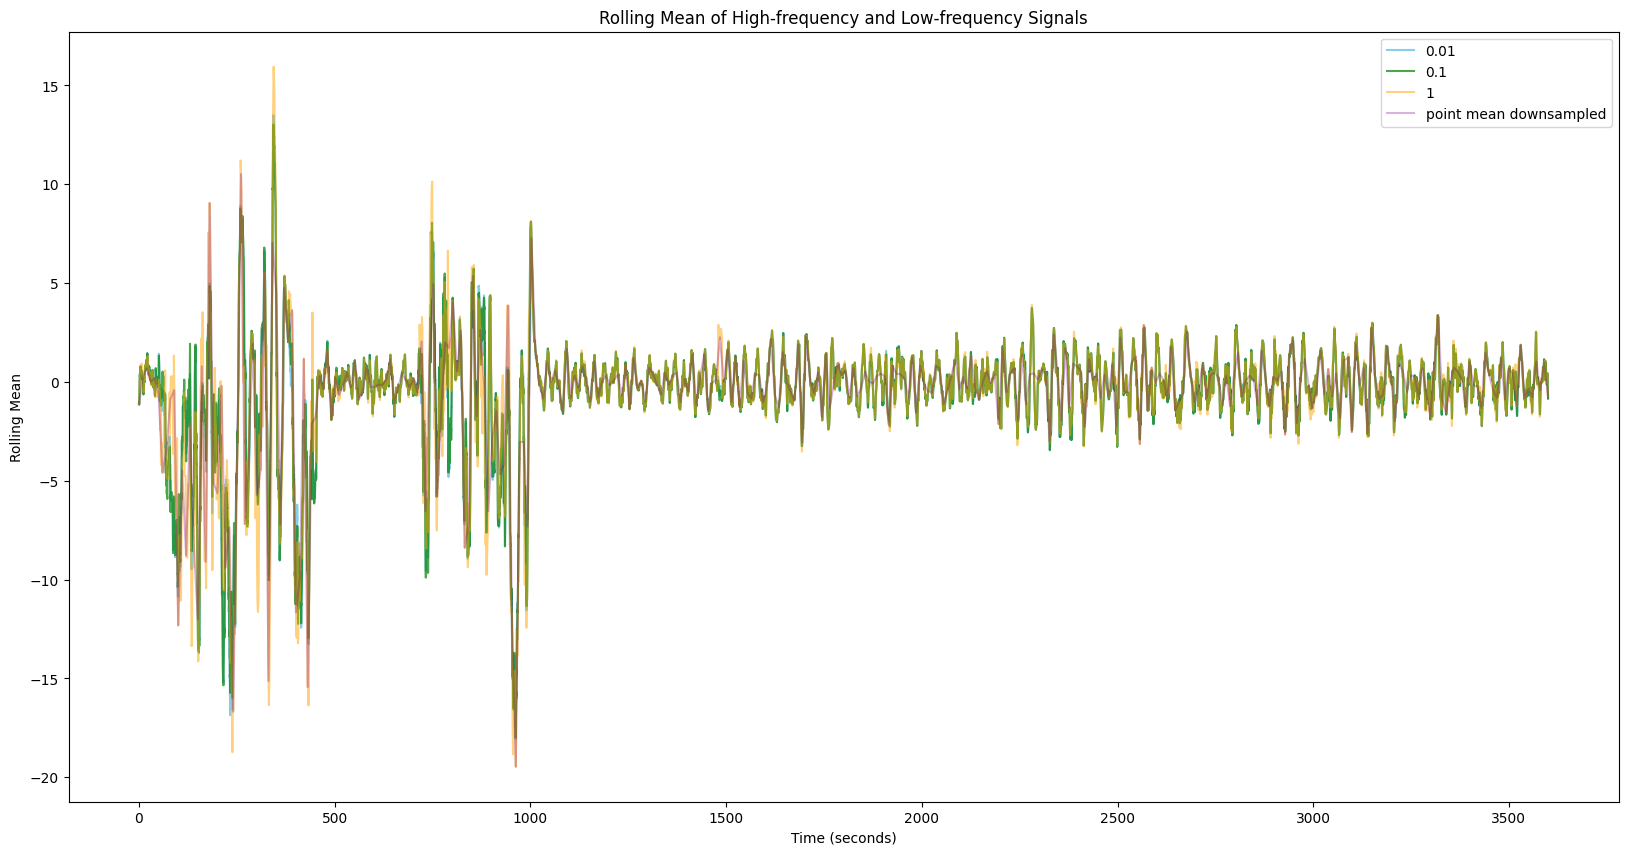

In [52]:
x1 = np.linspace(0, 3600, 359001)
x2 = np.linspace(0, 3600, 35901)
x3 = np.linspace(0, 3600, 3591)
x4 = np.linspace(0, 3600, 360)

plt.figure(figsize=(20, 10))
plt.plot(x1, rm1, label='0.01', alpha=1, color='skyblue')
plt.plot(x2, rm2, label='0.1', alpha=0.7, color='green')
plt.plot(x3, rm3, label='1', alpha=0.5, color='orange')
plt.plot(x4, means3, label='point mean downsampled', alpha=0.3, color='purple')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of High-frequency and Low-frequency Signals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

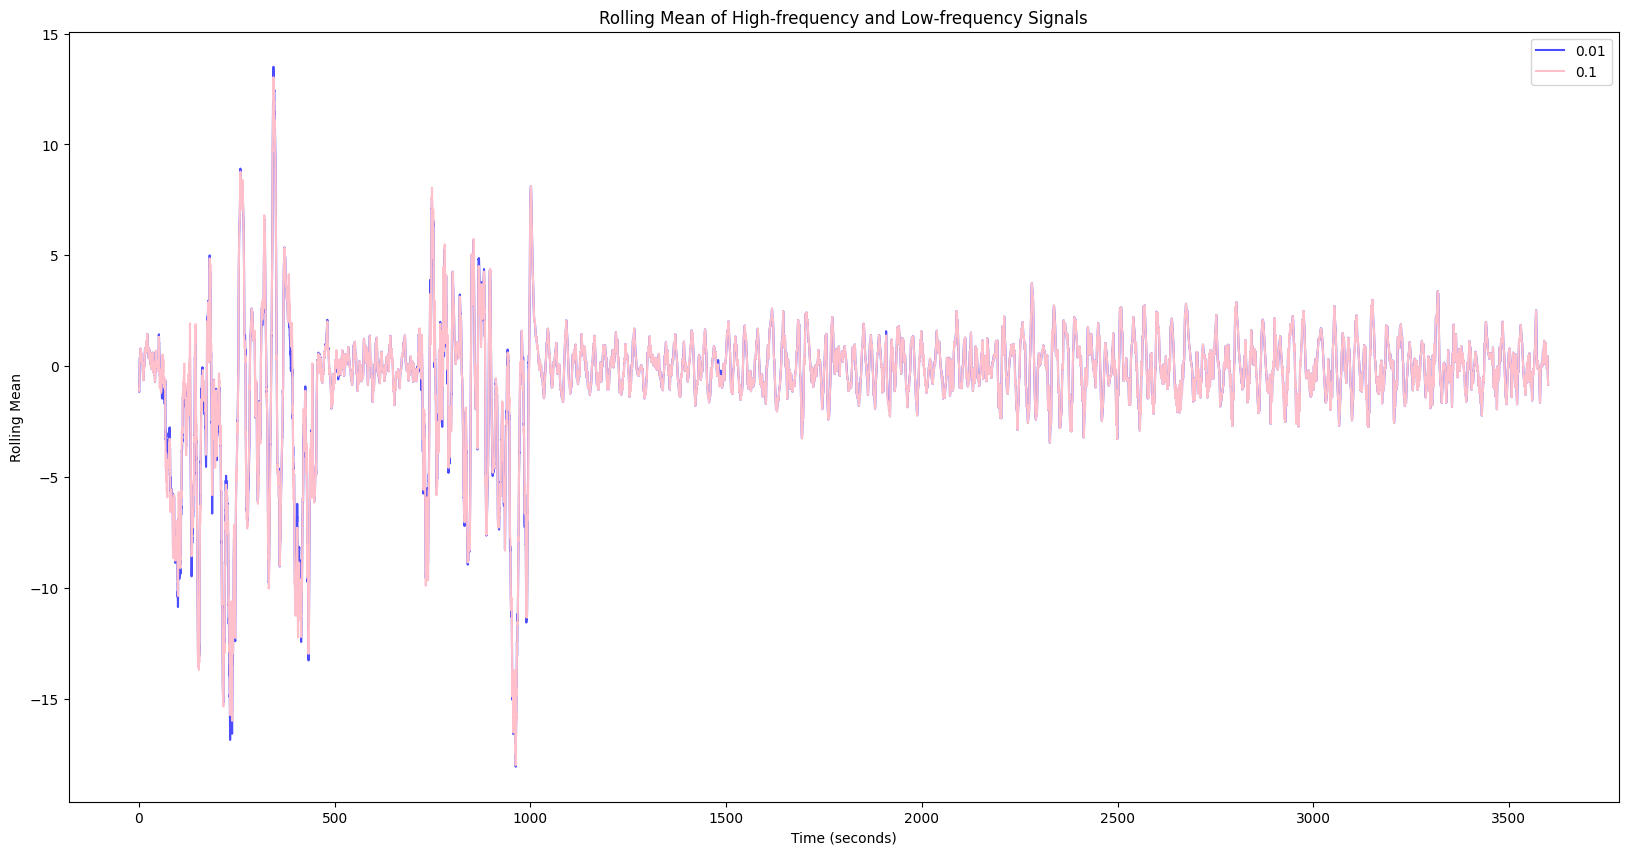

In [54]:
x1 = np.linspace(0, 3600, 359001)
x2 = np.linspace(0, 3600, 35901)
x3 = np.linspace(0, 3600, 3591)
x4 = np.linspace(0, 3600, 360)

plt.figure(figsize=(20, 10))
plt.plot(x1, rm1, label='0.01', alpha=0.7, color='blue')
plt.plot(x2, rm2, label='0.1', alpha=1, color='pink')
# plt.plot(x3, rm3, label='1', alpha=0.5, color='orange')
# plt.plot(x4, means2, label='0.01 mean', alpha=0.3, color='purple')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of High-frequency and Low-frequency Signals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

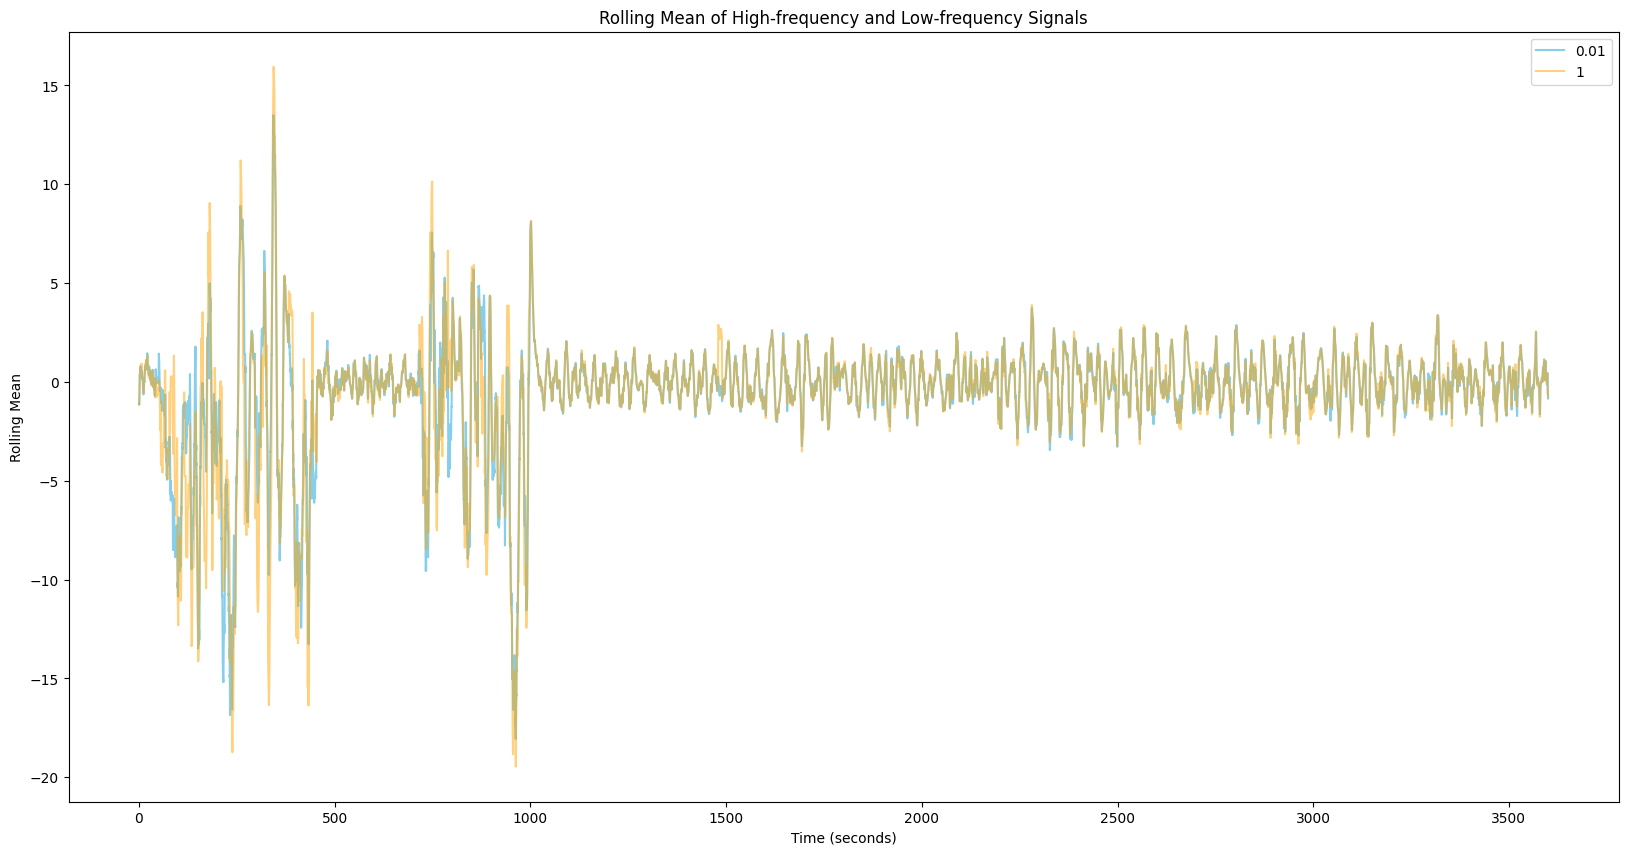

In [48]:
x1 = np.linspace(0, 3600, 359001)
x2 = np.linspace(0, 3600, 35901)
x3 = np.linspace(0, 3600, 3591)
x4 = np.linspace(0, 3600, 360)

plt.figure(figsize=(20, 10))
plt.plot(x1, rm1, label='0.01', alpha=1, color='skyblue')
# plt.plot(x2, rm2, label='0.1', alpha=0.7, color='green')
plt.plot(x3, rm3, label='1', alpha=0.5, color='orange')
# plt.plot(x4, means2, label='0.01 mean', alpha=0.3, color='purple')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of High-frequency and Low-frequency Signals')

# Add a legend
plt.legend()

# Show the plot
plt.show()

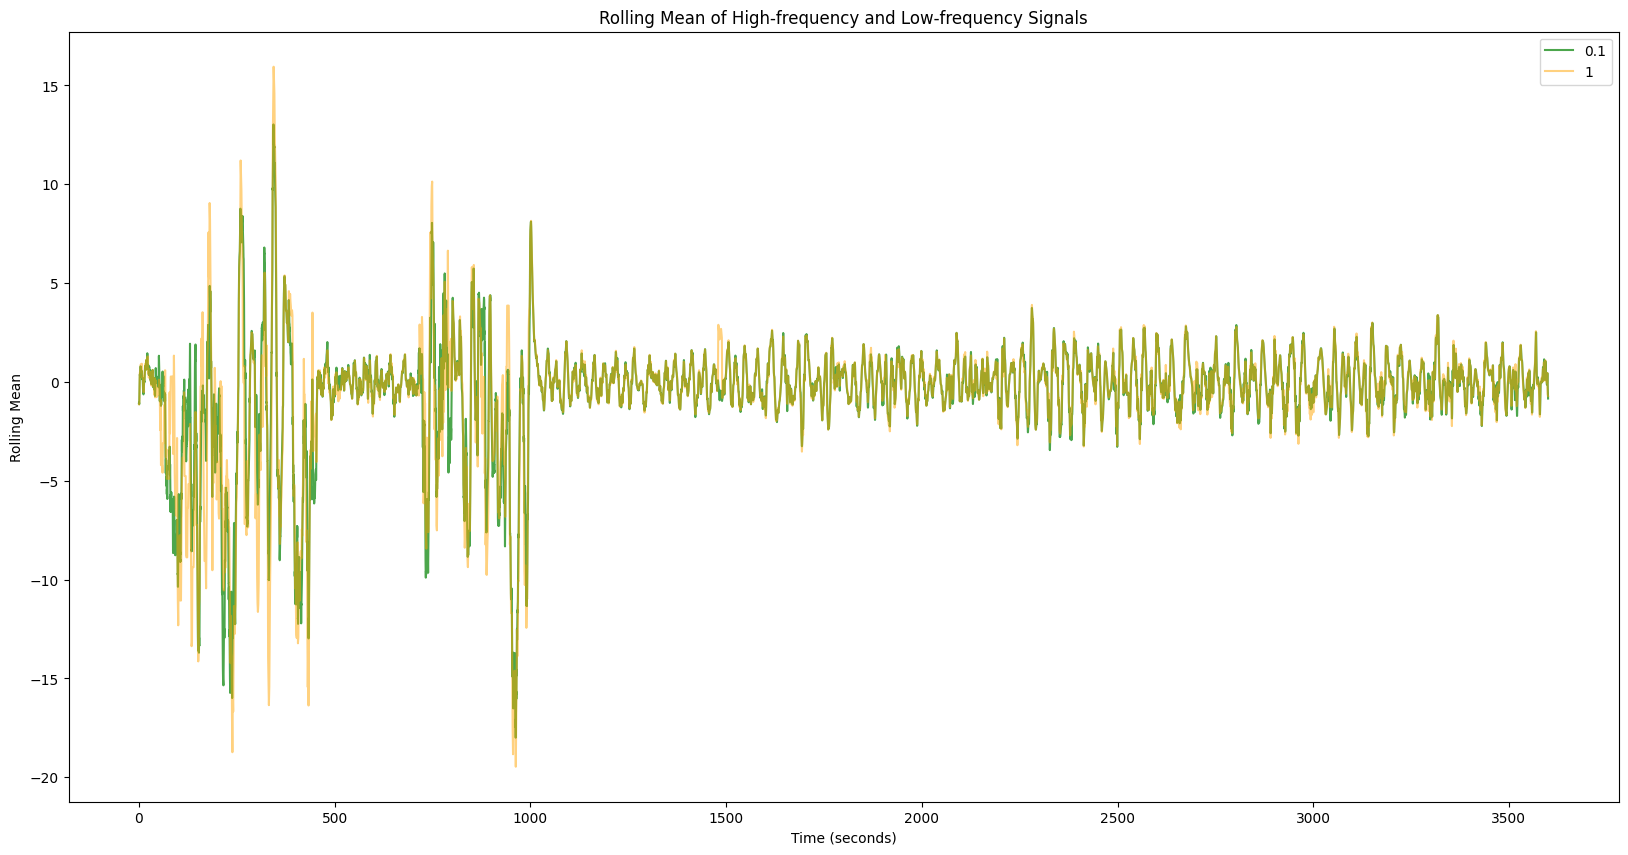

In [49]:
x1 = np.linspace(0, 3600, 359001)
x2 = np.linspace(0, 3600, 35901)
x3 = np.linspace(0, 3600, 3591)
x4 = np.linspace(0, 3600, 360)

plt.figure(figsize=(20, 10))
# plt.plot(x1, rm1, label='0.01', alpha=1, color='skyblue')
plt.plot(x2, rm2, label='0.1', alpha=0.7, color='green')
plt.plot(x3, rm3, label='1', alpha=0.5, color='orange')
# plt.plot(x4, means2, label='0.01 mean', alpha=0.3, color='purple')

# Add labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of High-frequency and Low-frequency Signals')

# Add a legend
plt.legend()

# Show the plot
plt.show()